In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Crear un DataFrame con los puntos dados
data = {
    'X': [24, 150, 85, 5, 75],
    'Y': [1.23, 2.00, 1.65, 0.50, 1.85]
}

df = pd.DataFrame(data)

# Mostrar las primeras 5 filas del DataFrame
print(df.head())


     X     Y
0   24  1.23
1  150  2.00
2   85  1.65
3    5  0.50
4   75  1.85


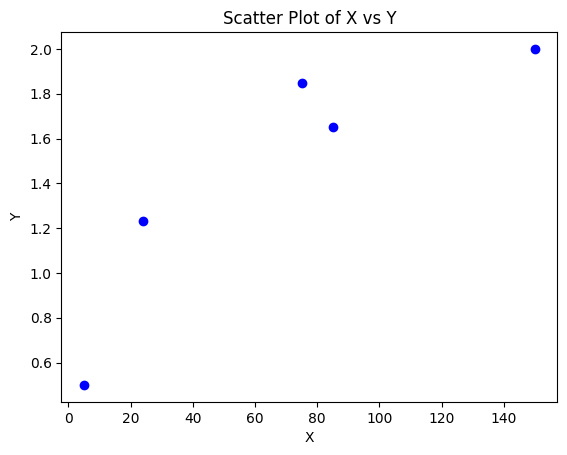

In [ ]:
# Visualizar los datos
plt.scatter(df['X'], df['Y'], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')
plt.show()


En Scikit-Learn, cuando seleccionas variables independientes (features) para el modelo, necesitas un array bidimensional (matriz) incluso si tienes una sola característica. El uso de [['X']] en lugar de ['X'] asegura que X sea un array 2D, con una columna y múltiples filas, como lo espera Scikit-Learn.

X debe ser un array 2D porque representa las características de entrada, que podrían ser múltiples columnas. Incluso si solo hay una columna, Scikit-Learn requiere que esté en formato de 2 dimensiones.
y es un array 1D porque representa la variable de salida, que normalmente es una sola columna de valores.


lin_reg.fit(X, y)
Objetivo: Esta línea ajusta (o entrena) el modelo de regresión lineal utilizando los datos de entrada X y las salidas y.
Descripción:
X: Es el array 2D que contiene las características o variables independientes.
y: Es el array 1D que contiene la variable dependiente o objetivo.
El método fit calcula los coeficientes de la ecuación de la recta (pendiente e intercepto) que mejor ajustan los datos proporcionados.

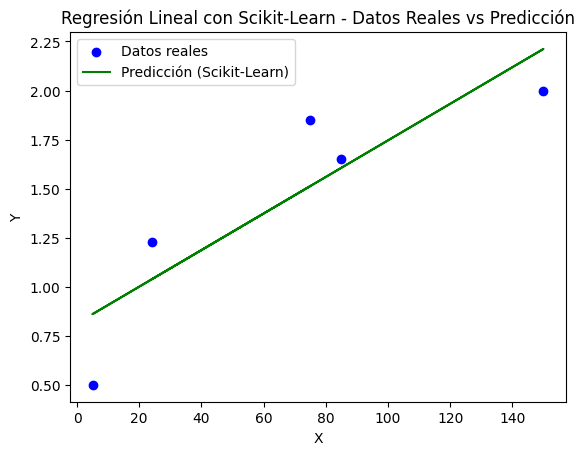

In [ ]:
# Usar Scikit-Learn para validar el modelo
X = df[['X']].values
y = df['Y'].values # por tiene dos corchetes

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_sklearn = lin_reg.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)


# Visualizar los resultados
plt.scatter(df['X'], df['Y'], color='blue', label='Datos reales')
plt.plot(df['X'], y_pred_sklearn, color='green', label='Predicción (Scikit-Learn)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal con Scikit-Learn - Datos Reales vs Predicción')
plt.legend()
plt.show()


lin_reg.coef_:

Después de entrenar un modelo de regresión lineal con lin_reg.fit(X, y), los coeficientes de la regresión se almacenan en el atributo coef_ del objeto lin_reg.
lin_reg.coef_ es un array que contiene los coeficientes de las variables independientes (características) en tu modelo. En el caso de una regresión lineal simple (una sola característica), coef_ será un array de un solo valor.
lin_reg.coef_[0]:

El índice [0] selecciona el primer (y único) coeficiente del array coef_.
En una regresión lineal simple, este coeficiente representa la pendiente de la recta que mejor ajusta los datos. Es decir, por cada unidad de cambio en X, el valor de y cambia en m unidades.

In [ ]:
# prompt: ecuacion de la recta

# Obtener la pendiente (m) y la intersección (b) de la recta ajustada
m = lin_reg.coef_[0]
b = lin_reg.intercept_

# Imprimir la ecuación de la recta
print(f"Ecuación de la recta: Y = {m:.4f}X + {b:.4f}")


Ecuación de la recta: Y = 0.0093X + 0.8142


In [ ]:
# prompt: reemplazar cuando x=35

import numpy as np
# Predecir el valor de Y cuando X = 35
nuevo_x = np.array([[35]])
prediccion = lin_reg.predict(nuevo_x)

print(f"Predicción para X = 35: Y = {prediccion[0]:.4f}")


Predicción para X = 35: Y = 1.1404


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Suponiendo que ya tienes calculado y_pred_sklearn y y

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y, y_pred_sklearn)
print(f"MAE: {mae}")

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y, y_pred_sklearn)
print(f"R²: {r2}")

# Calcular el Error Cuadrático Medio (MSE)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"MSE: {mse_sklearn}")

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse_sklearn)
print(f"RMSE: {rmse}")



MAE: 0.22910849245766104
R²: 0.7746878308004694
MSE: 0.06549013634821237
RMSE: 0.2559104068775093


E valor de MAE es 0.2291. Esto significa que, en promedio, las predicciones del modelo se desvían de los valores reales en aproximadamente 0.2291 unidades (en la misma escala que la variable dependiente). **Cuanto menor sea el MAE, mejor es el rendimiento del modelo en términos de precisión de las predicciones.**

Un R² de 0.7747 indica que aproximadamente el 77.47% de la variabilidad en la variable dependiente es explicada por las variables independientes en tu modelo. Un valor de R² más cercano a 1 indica un mejor ajuste del modelo a los datos. En este caso, el modelo explica bien los datos, aunque todavía hay un 22.53% de la variabilidad que no es capturada por el modelo.

Un MSE de 0.0655 indica que, en promedio, el error al cuadrado entre las predicciones y los valores reales es 0.0655. Debido a que los errores están elevados al cuadrado, un valor más bajo de MSE es deseable y sugiere un modelo con predicciones más precisas. Sin embargo, este valor no tiene una interpretación directa en las unidades de la variable dependiente.

Un RMSE de 0.2559 significa que, en promedio, las predicciones del modelo están a una distancia de 0.2559 unidades del valor real. El RMSE es más fácil de interpretar que el MSE porque está en la misma escala que la variable de salida. **Similar al MAE, un valor más bajo de RMSE sugiere un mejor rendimiento del modelo.**